In [1]:
import torch

x = torch.arange(4.0)
x 

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)
x.grad   # 存储f(x)对向量x的梯度，默认值为None

In [3]:
y = 2*torch.dot(x, x) # f(x) = 2*xTx
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()            # 反向传播函数，自动计算y关于x的每个分量的梯度
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad == 4*x

tensor([True, True, True, True])

In [6]:
# 计算y = sum(x) 时，关于x的每个分量的梯度
x.grad.zero_()  # 默认会累积梯度，此时需清除以前的值
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

非标量变量的反向传播

In [13]:
# 非标量调用backward函数需要传入一个gradient参数，该参数指定微分函数关于self的梯度
x .grad.zero_()
y = x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

分离计算

In [14]:
# 分离y返回一个新变量u，u与y具有相同的值，但丢弃计算图中如何计算y的任何信息
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [15]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x 

tensor([True, True, True, True])

扩展

In [20]:
print("x是叶子节点, 即我们自己创建的节点。x.is_leaf = ", x.is_leaf)
print("y不是叶子节点, 是在创建的节点上计算得到。y.is_leaf = ", y.is_leaf)
print("u是叶子节点。通过detach将y从计算图上分离出来。u.is_leaf = ", u.is_leaf)

x是叶子节点, 即我们自己创建的节点。x.is_leaf =  True
y不是叶子节点, 是在创建的节点上计算得到。y.is_leaf =  False
u是叶子节点。通过detach将y从计算图上分离出来。u.is_leaf =  True


Python控制流的梯度计算

In [21]:
def f(a):
    b = a*2
    while b.norm() < 1000:
        b = b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [22]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [23]:
a.grad == d/a

tensor(True)

In [ ]:
# 将变量a更改为随机向量
a = torch.randn(size=(1, 4), requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d/a

tensor([[True, True, True, True]])

f(x) = sin(x) , 绘制f(x)及其导数的图像

In [54]:
x = torch.arange(-3, 3, 0.1, requires_grad=True)
y = torch.sin(x)
y.sum().backward()

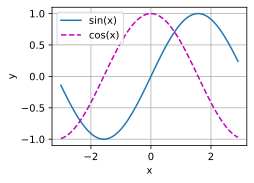

In [55]:
from d2l import torch as d2l
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad], 'x', 'y', legend=['sin(x)', 'cos(x)'])